<a href="https://colab.research.google.com/github/ForhanShahriarFahim/Artificial-Intelligence-Lab/blob/master/Simple_DNN(Assignment_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing library

In [15]:
from keras import layers, Model
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

### y = 5x^3-8x^2-7x+1

In [16]:
def y_value_calc(x):
  return 5 * x**3 - 8 * x**2 - 7 * x + 1

### Creating Dataset

In [17]:
def value_generate(data):
  x = np.random.randint(-20, 20, data, dtype=int)
  y = y_value_calc(x);
  return x, y

### Building the Model

In [18]:
def dnn_model():
  inputs = layers.Input(shape=(1))
  hidden_layer_1 = layers.Dense(32, activation='relu')(inputs)
  hidden_layer_2 = layers.Dense(64, activation='relu')(hidden_layer_1)
  hidden_layer_3 = layers.Dense(128, activation='relu')(hidden_layer_2)
  outputs = layers.Dense(1)(hidden_layer_3)

  model = Model(inputs = inputs, outputs = outputs)
  return model

### Creating training, validation and test split

In [19]:
x, y = value_generate(10000)
# Performing Normalization
x_min = np.min(x)
x_max = np.max(x)
x_data = (2 * (x - x_min) / (x_max - x_min)) - 1

y_min = np.min(y)
y_max = np.max(y)
y_data = (2 * (y - y_min) / (y_max - y_min)) - 1

data_length = len(x_data)
# Train
x_train, y_train = x_data[:int(data_length*0.9)], y_data[:int(data_length*0.9)]
#Validation
x_validation, y_validation = x_data[int(data_length*0.90):int(data_length*0.95)], y_data[int(data_length*0.90):int(data_length*0.95)]
# Test
x_test, y_test = x_data[int(data_length*.95):], y_data[int(data_length*0.95):]


### Model Train

In [20]:
model = dnn_model()
model.summary()
# Compile the model and train
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss='mse',metrics=[tf.keras.metrics.R2Score(name='accuracy')])
fitted_model = model.fit(x_train, y_train, epochs=10, validation_data=(x_validation, y_validation))

history = fitted_model.history


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_4 (Dense)             (None, 32)                64        
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
282/282 [===

In [21]:
history

{'loss': [0.010616080835461617,
  0.00011883248225785792,
  3.218272831873037e-05,
  1.4240707059798297e-05,
  8.517660717188846e-06,
  9.196032806357834e-06,
  4.647378318622941e-06,
  4.612034445017343e-06,
  2.334873533982318e-05,
  6.011338336975314e-05],
 'accuracy': [0.9395732283592224,
  0.9993236064910889,
  0.9998168349266052,
  0.9999189376831055,
  0.9999515414237976,
  0.9999476671218872,
  0.9999735355377197,
  0.9999737739562988,
  0.9998670816421509,
  0.9996578097343445],
 'val_loss': [0.00023606204194948077,
  3.132324491161853e-05,
  2.295455487910658e-05,
  4.631624960893532e-06,
  7.34609056962654e-06,
  7.593600457767025e-06,
  5.63147750654025e-06,
  1.649178898333048e-06,
  0.00015398234245367348,
  2.7560388389247237e-06],
 'val_accuracy': [0.998600423336029,
  0.9998142719268799,
  0.9998639225959778,
  0.9999725222587585,
  0.9999564290046692,
  0.9999549984931946,
  0.9999666213989258,
  0.9999902248382568,
  0.9990870952606201,
  0.9999836683273315]}

16/16 [==============================] - 0s 4ms/step - loss: 2.5864e-06 - accuracy: 1.0000
Test Loss: 2.586376695035142e-06
Test Accuracy: 0.9999857544898987
16/16 [==============================] - 0s 3ms/step


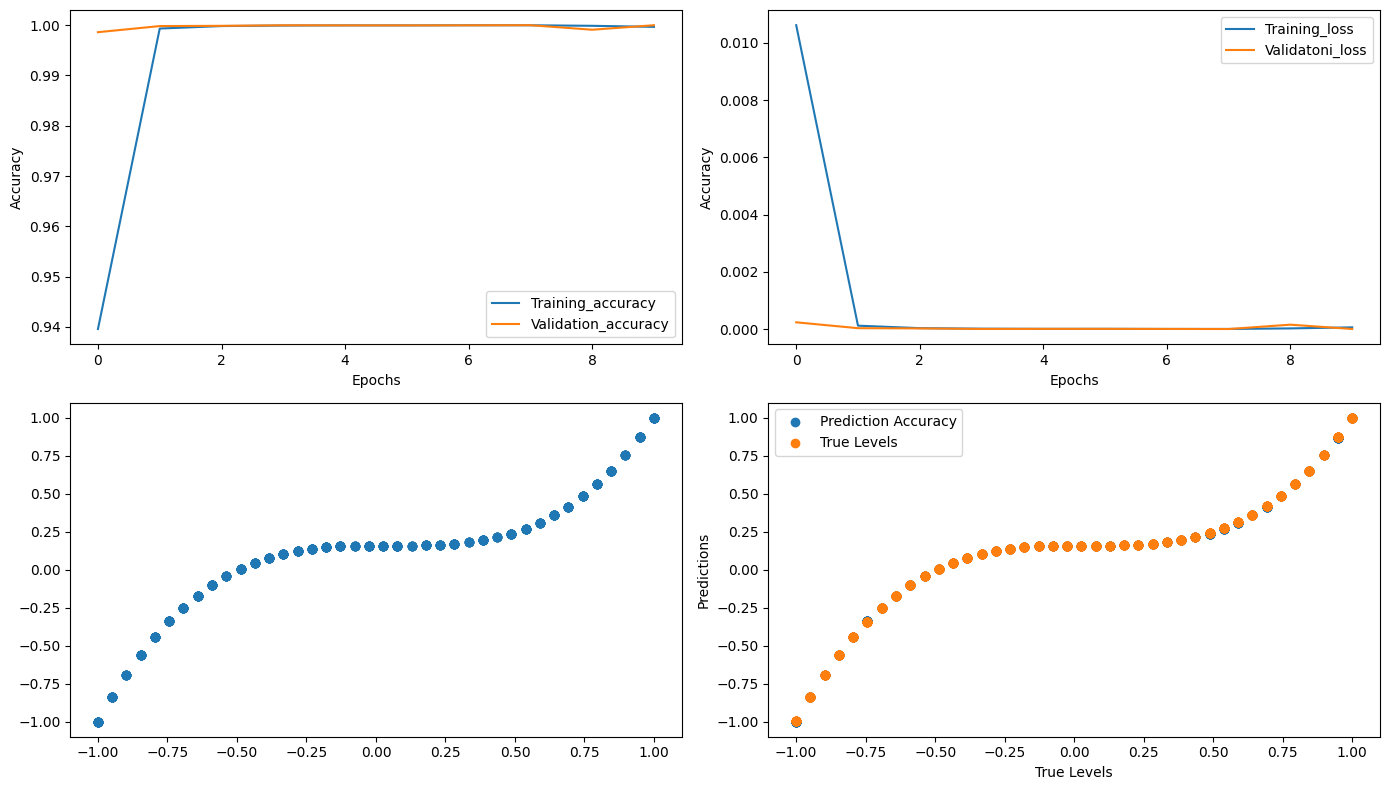

In [22]:
plt.figure(figsize=(14,8))

# Plot Training and Validation Accuracy
plt.subplot(2,2,1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training_accuracy', 'Validation_accuracy'])

# Plot Training and Validation Loss
plt.subplot(2,2,2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training_loss', 'Validatoni_loss'])

plt.subplot(2,2,3)
plt.scatter(x_test,y_test)

# Evaluate the Model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict on test data
predictions = model.predict(x_test)

# Plot prediction accuracy vs true levels
plt.subplot(2,2,4)
plt.scatter(x_test,y_test)
plt.scatter(x_test, predictions)
plt.ylabel('Predictions')
plt.xlabel('True Levels')
plt.legend(['Prediction Accuracy', 'True Levels'])


plt.tight_layout()
plt.show()